In [1]:
import pandas as pd
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_tags = pd.read_csv("df_tags_so.csv")
df_tag = pd.read_csv("df_tag_so.csv")

In [3]:
df_tags

Tag_1                   Tag_2  Count  Proportion
0            .net  .net-framework-version     32    0.026852
1            .net                   alias     37    0.031048
2            .net      character-encoding     32    0.026852
3            .net                   clone     39    0.032726
4            .net       code-organization     33    0.027691
...           ...                     ...    ...         ...
1824  xml-parsing            html-parsing      5    0.004196
1825        yield               coroutine     10    0.008391
1826      youtube             youtube-api      5    0.004196
1827      youtube        youtube-data-api      6    0.005035
1828  youtube-api        youtube-data-api      5    0.004196

[1829 rows x 4 columns]

In [7]:
df_tag

Tag  Count  Proportion
0                  java     37    0.100334
1                   c++     21    0.056946
2           performance     10    0.027117
3          optimization      4    0.010847
4     branch-prediction      2    0.005423
...                 ...    ...         ...
1765                sql      9    0.024405
1766         sql-server      5    0.013559
1767               tsql      3    0.008135
1768               date      5    0.013559
1769           datetime      8    0.021694

[1770 rows x 3 columns]

In [4]:
G = nx.Graph()

In [11]:
for index, row in df_tag.iterrows():
    G.add_node(row["Tag"], nodesize = row["Proportion"])

In [12]:
for index, row in df_tags.iterrows():
    G.add_edge(row["Tag_1"], row["Tag_2"], weight = row["Proportion"])

In [13]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 630
Number of edges: 1822
Average degree:   5.7841


In [14]:
%%time
GN = nxcom.girvan_newman(G)
communities = next(GN)

Wall time: 57.1 s


In [15]:
new = []
for i in range(len(communities)):
    for item in {x for x in communities[i] if pd.notna(x)}:
        new.append([item, i+1])

In [16]:
map_group = pd.DataFrame(new).set_index(0).to_dict()[1]

In [17]:
df_tag["group"] = df_tag.Tag.map(map_group)

In [18]:
df_tag

Tag  Count  Proportion  group
0                  java     37    0.100334      1
1                   c++     21    0.056946      1
2           performance     10    0.027117      1
3          optimization      4    0.010847      1
4     branch-prediction      2    0.005423      1
...                 ...    ...         ...    ...
1765                sql      9    0.024405      1
1766         sql-server      5    0.013559      1
1767               tsql      3    0.008135      1
1768               date      5    0.013559      1
1769           datetime      8    0.021694      1

[1770 rows x 4 columns]

In [19]:
df_tags

Tag_1                   Tag_2  Count  Proportion
0            .net  .net-framework-version     32    0.026852
1            .net                   alias     37    0.031048
2            .net      character-encoding     32    0.026852
3            .net                   clone     39    0.032726
4            .net       code-organization     33    0.027691
...           ...                     ...    ...         ...
1824  xml-parsing            html-parsing      5    0.004196
1825        yield               coroutine     10    0.008391
1826      youtube             youtube-api      5    0.004196
1827      youtube        youtube-data-api      6    0.005035
1828  youtube-api        youtube-data-api      5    0.004196

[1829 rows x 4 columns]

In [20]:
df_tag.group.value_counts()

1     1451
2      289
6       10
3        5
9        4
8        3
4        3
10       2
5        2
7        1
Name: group, dtype: int64

In [21]:
df_tag_ = df_tag[(df_tag.group == 1) | (df_tag.group == 2)]
df_tag_

Tag  Count  Proportion  group
0                  java     37    0.100334      1
1                   c++     21    0.056946      1
2           performance     10    0.027117      1
3          optimization      4    0.010847      1
4     branch-prediction      2    0.005423      1
...                 ...    ...         ...    ...
1765                sql      9    0.024405      1
1766         sql-server      5    0.013559      1
1767               tsql      3    0.008135      1
1768               date      5    0.013559      1
1769           datetime      8    0.021694      1

[1740 rows x 4 columns]

In [22]:
tags_interes = list(df_tag_["Tag"])

In [23]:
df_tags_ = df_tags[df_tags.Tag_1.isin(tags_interes)]

In [24]:
G = nx.Graph()

In [25]:
for index, row in df_tag_.iterrows():
    G.add_node(row["Tag"], group = row["group"], nodesize = row["Proportion"] )

In [26]:
for index, row in df_tags_.iterrows():
    G.add_edge(row["Tag_1"], row["Tag_2"], weight = row["Proportion"])

In [27]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 603
Number of edges: 1783
Average degree:   5.9138


In [28]:
%%time
GN = nxcom.girvan_newman(G)
communities = next(GN)

Wall time: 58 s


In [30]:
new = []
for i in range(len(communities)):
    for item in {x for x in communities[i] if pd.notna(x)}:
        new.append([item, i+1])

In [31]:
map_group = pd.DataFrame(new).set_index(0).to_dict()[1]

In [32]:
df_tag_["group"] = df_tag_.Tag.map(map_group)

<ipython-input-32-9e924bc58593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tag_["group"] = df_tag_.Tag.map(map_group)


In [33]:
G = nx.Graph()

In [34]:
for index, row in df_tag_.iterrows():
    G.add_node(row["Tag"], group = row["group"], nodesize = row["Proportion"] )

In [35]:
for index, row in df_tags_.iterrows():
    G.add_edge(row["Tag_1"], row["Tag_2"], weight = row["Proportion"])

In [36]:
df_tag_.group.value_counts()

1    1451
2     289
Name: group, dtype: int64

In [37]:
nodes = G.nodes()

In [38]:
color_map = {1:'goldenrod', 2:'yellowgreen', 3:'#52be80', 4:'#28b463', 5:'#bcc2f2', 6:'#2c3e50',  
             7:'#eebcbc', 8: '#33c3ee', 9: '#FF5733', 10: '#f39c12'} 

In [39]:
node_color = [color_map[d['group']] for n,d in G.nodes(data=True)]

In [40]:
node_size = [d['nodesize']*10000 for n,d in G.nodes(data=True)]

In [41]:
pos = nx.drawing.spring_layout(G)

In [42]:
weights = [G[u][v]['weight']*5 for u,v in G.edges()]

In [43]:
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0] + 100, coords[1] + 100)

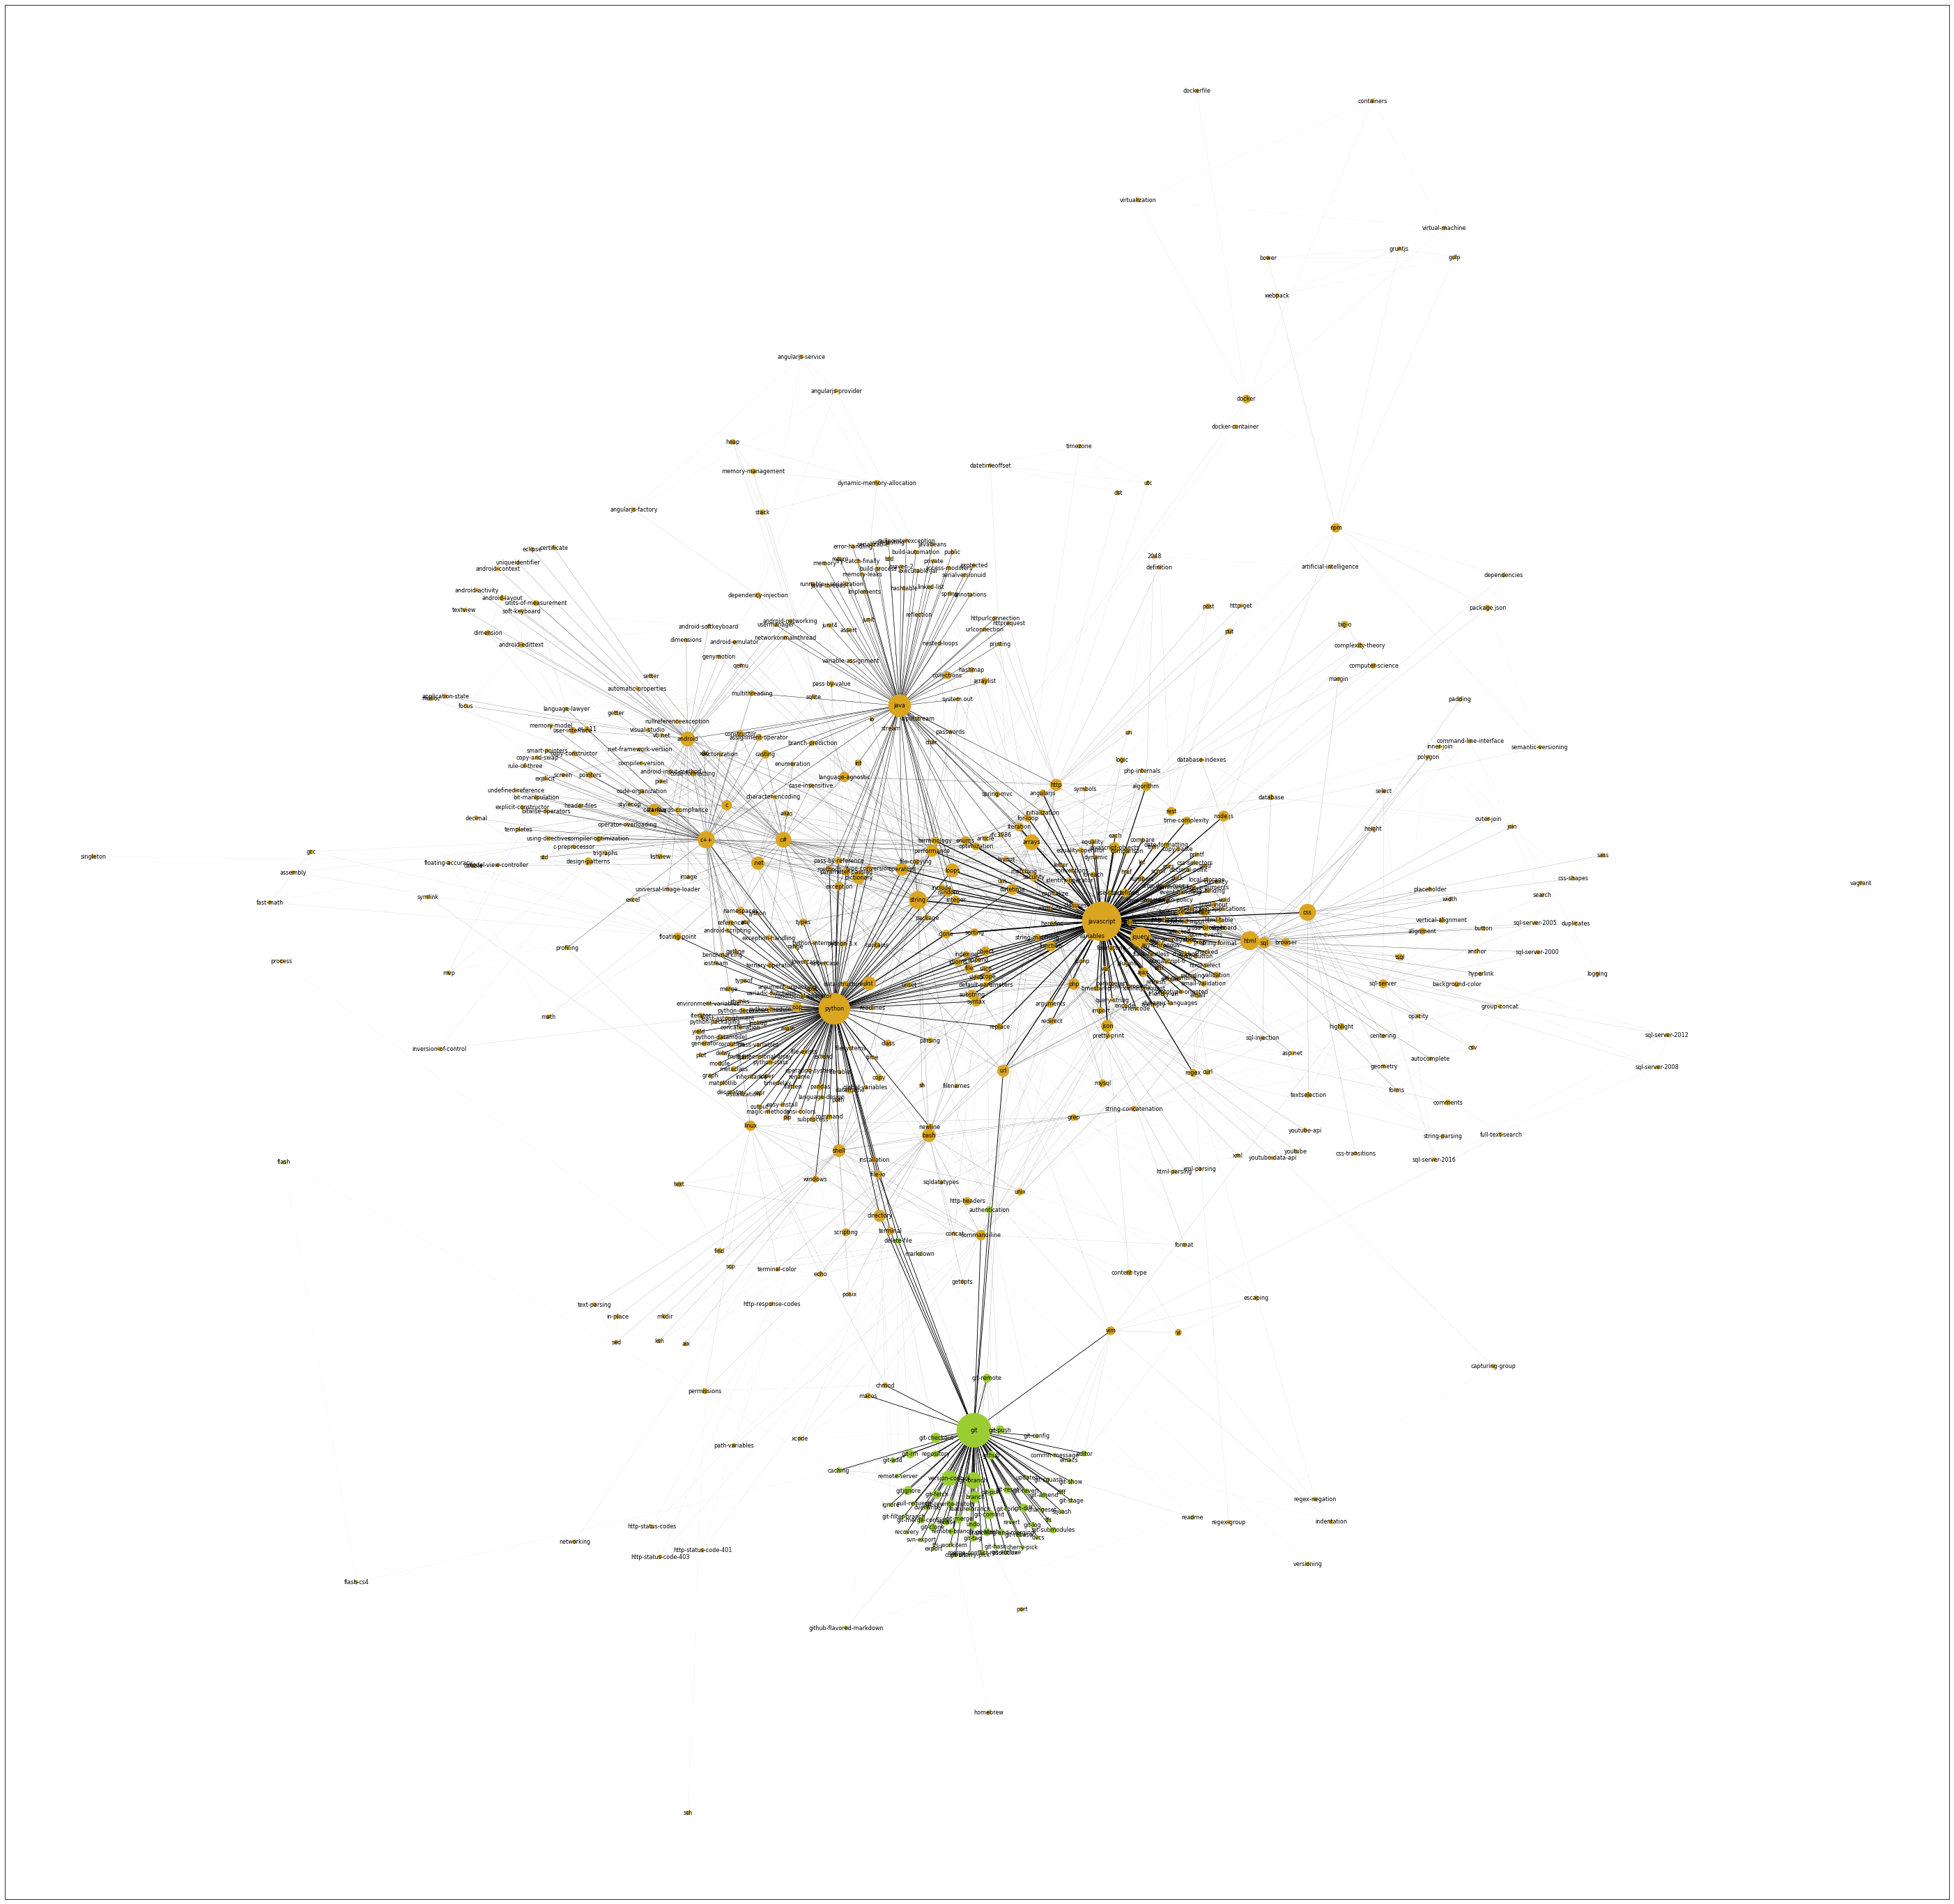

In [44]:
plt.figure(figsize=(50,50))
nx.draw_networkx(G, pos, node_color = node_color, node_size = node_size, width = weights, alpha = 1,
                font_size = 8, with_labels = True)

Filtro para quedarnos con los dos grupos más grandes.

In [53]:
df_tag_ = df_tag[(df_tag.group == 1) | (df_tag.group == 2)]
df_tag_

Tag  Count  Proportion  group
0                  java     37    0.100334      1
1                   c++     21    0.056946      1
2           performance     10    0.027117      1
3          optimization      4    0.010847      1
4     branch-prediction      2    0.005423      1
...                 ...    ...         ...    ...
1765                sql      9    0.024405      1
1766         sql-server      5    0.013559      1
1767               tsql      3    0.008135      1
1768               date      5    0.013559      1
1769           datetime      8    0.021694      1

[1740 rows x 4 columns]

In [54]:
tags_interes = list(df_tag_["Tag"])

In [55]:
df_tags_ = df_tags[df_tags.Tag_1.isin(tags_interes)]

In [56]:
G = nx.Graph()

In [57]:
for index, row in df_tag_.iterrows():
    G.add_node(row["Tag"], group = row["group"], nodesize = row["Proportion"] )

In [58]:
for index, row in df_tags_.iterrows():
    G.add_edge(row["Tag_1"], row["Tag_2"], weight = row["Proportion"])

In [59]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 603
Number of edges: 1783
Average degree:   5.9138


In [60]:
df_tag_.group.value_counts()

1    1451
2     289
Name: group, dtype: int64

In [61]:
nodes = G.nodes()

In [62]:
color_map = {1:'goldenrod', 2:'yellowgreen', 3:'#52be80', 4:'#28b463', 5:'#bcc2f2', 6:'#2c3e50',  
             7:'#eebcbc', 8: '#33c3ee', 9: '#FF5733', 10: '#f39c12'} 

In [63]:
node_color = [color_map[d['group']] for n,d in G.nodes(data=True)]

In [64]:
node_size = [d['nodesize']*10000 for n,d in G.nodes(data=True)]

In [65]:
pos = nx.drawing.spring_layout(G)

In [66]:
weights = [G[u][v]['weight']*5 for u,v in G.edges()]

In [67]:
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0] + 100, coords[1] + 100)

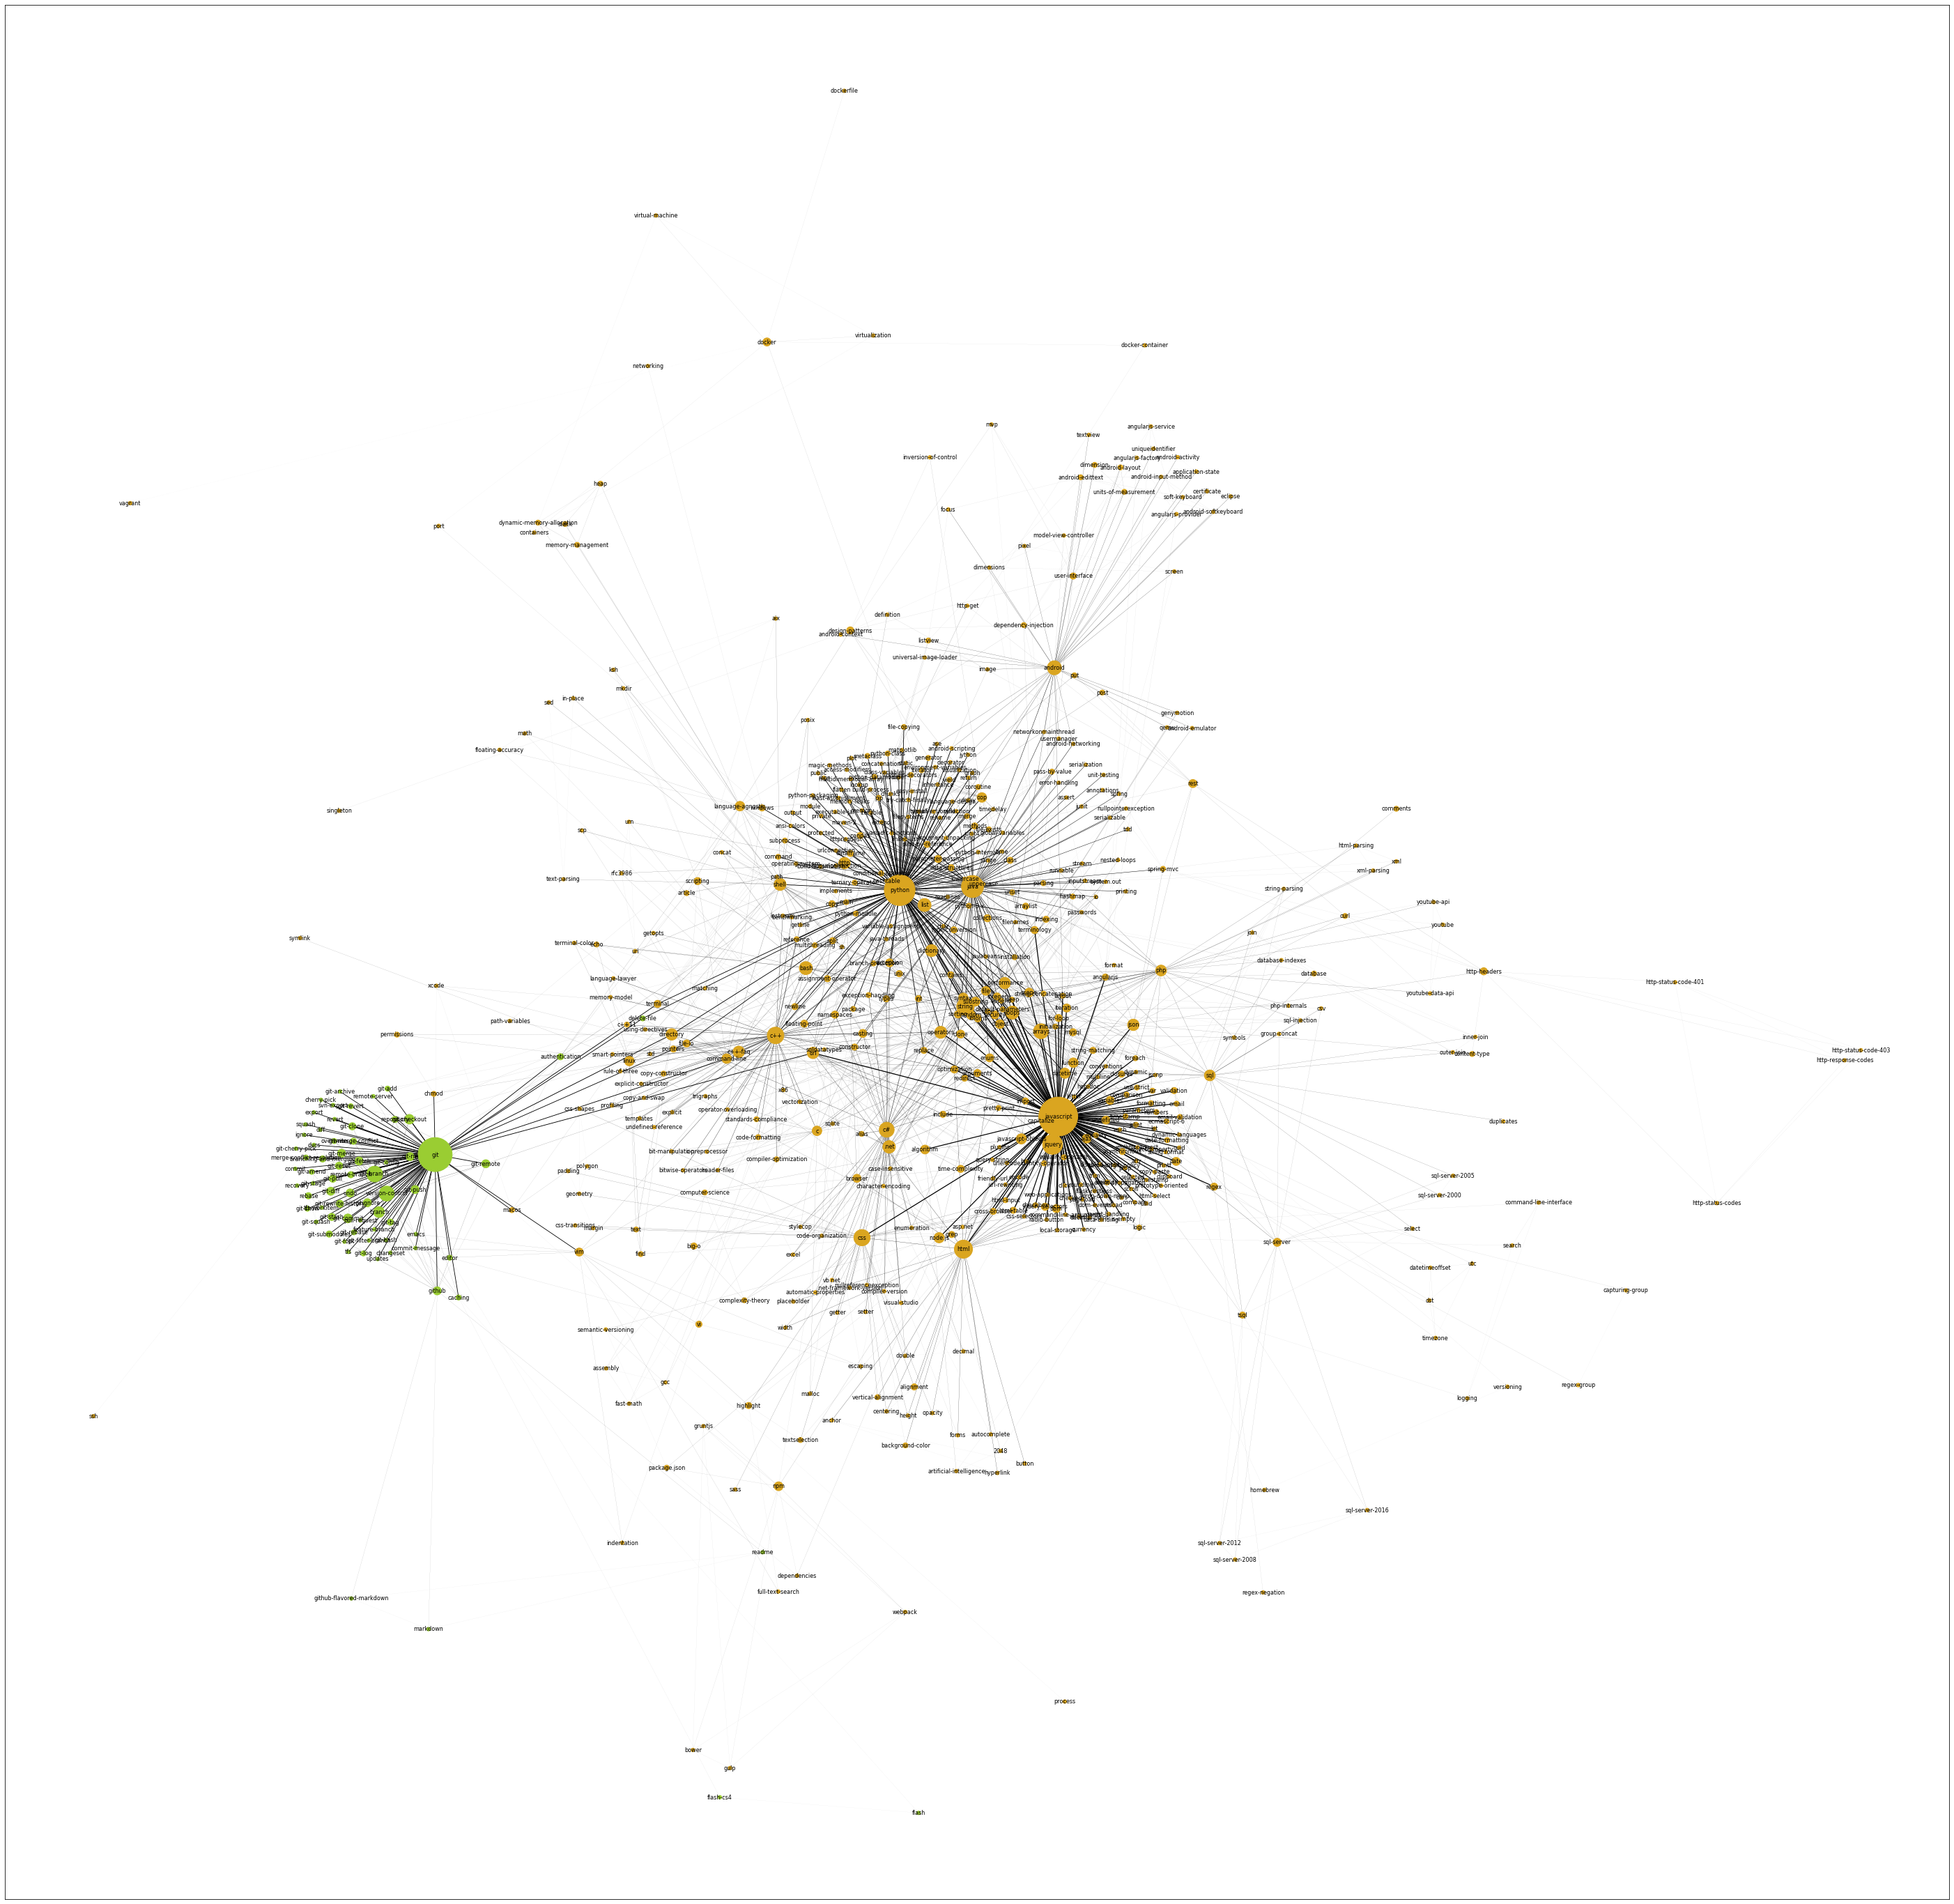

In [68]:
plt.figure(figsize=(50,50))
nx.draw_networkx(G, pos, node_color = node_color, node_size = node_size, width = weights, alpha = 1,
                font_size = 8, with_labels = True)

Medidas

In [90]:
X1 = pd.DataFrame([list(nx.degree_centrality(G).keys()), list(nx.degree_centrality(G).values())]).T.rename(columns={0:"tag", 1:"Degree centrality"})
X1 = X1.sort_values(by="Degree centrality", ascending = False).head(10)
X1

tag Degree centrality
26  javascript          0.222591
14      python          0.200997
0         java           0.13289
5          git          0.122924
1          c++          0.076412
34      jquery         0.0647841
54      string         0.0647841
78     android         0.0598007
64          c#         0.0531561
37        html         0.0531561

In [91]:
X2 = pd.DataFrame([list(nx.betweenness_centrality(G).keys()), list(nx.betweenness_centrality(G).values())]).T.rename(columns={0:"tag", 1:"Betweenness centrality"})
X2 = X2.sort_values(by="Betweenness centrality", ascending = False).head(10)
X2

tag Betweenness centrality
26     javascript                0.31531
14         python               0.289538
5             git               0.193409
0            java               0.149393
120           url              0.0900145
78        android              0.0771847
1             c++              0.0737212
2     performance              0.0609102
54         string              0.0581294
269  command-line              0.0461287

In [92]:
X3 = pd.DataFrame([list(nx.pagerank(G).keys()), list(nx.pagerank(G).values())]).T.rename(columns={0:"tag", 1:"Pagerank"})
X3 = X3.sort_values(by="Pagerank", ascending = False).head(10)
X3

tag    Pagerank
26  javascript    0.116187
14      python   0.0835864
5          git   0.0534964
0         java   0.0394314
1          c++    0.016702
78     android   0.0124347
54      string  0.00892865
37        html  0.00856615
64          c#   0.0085028
34      jquery  0.00785357

In [93]:
X4 = pd.DataFrame([list(nx.closeness_centrality(G).keys()), list(nx.closeness_centrality(G).values())]).T.rename(columns={0:"tag", 1:"Closeness centrality"})
X4 = X4.sort_values(by="Closeness centrality", ascending = False).head(10)
X4

tag Closeness centrality
26    javascript             0.435286
14        python             0.432161
54        string             0.410641
2    performance             0.407307
23     operators              0.39295
132        loops             0.390149
107     security             0.389896
145      replace             0.381254
229       random             0.379093
230      integer             0.378855

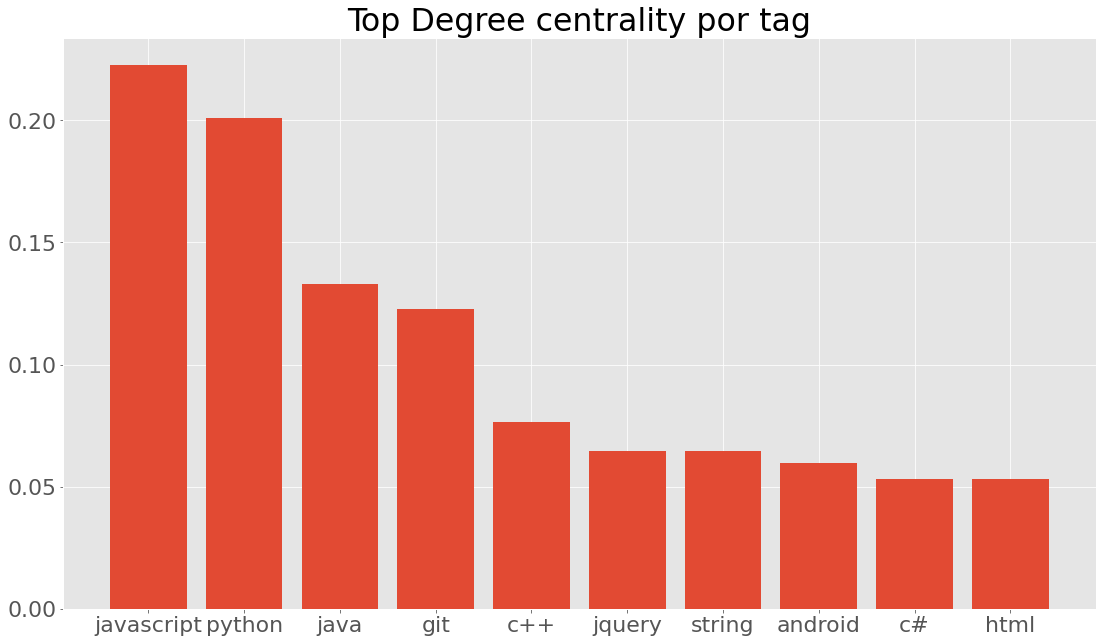

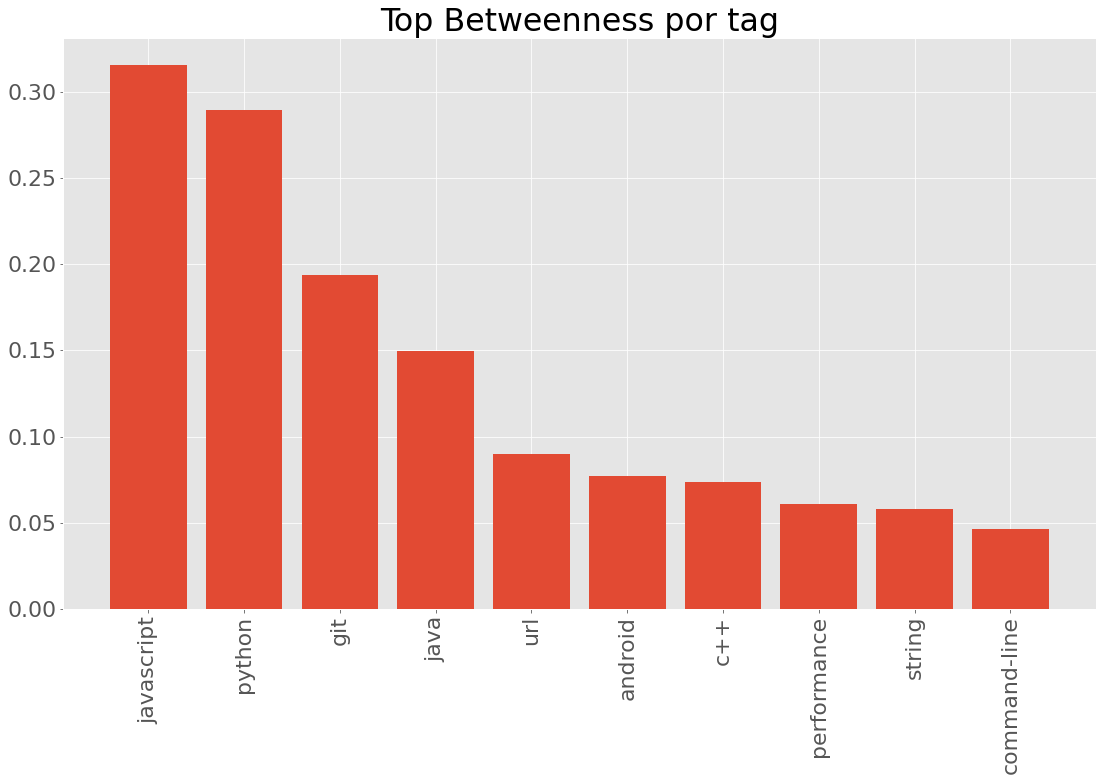

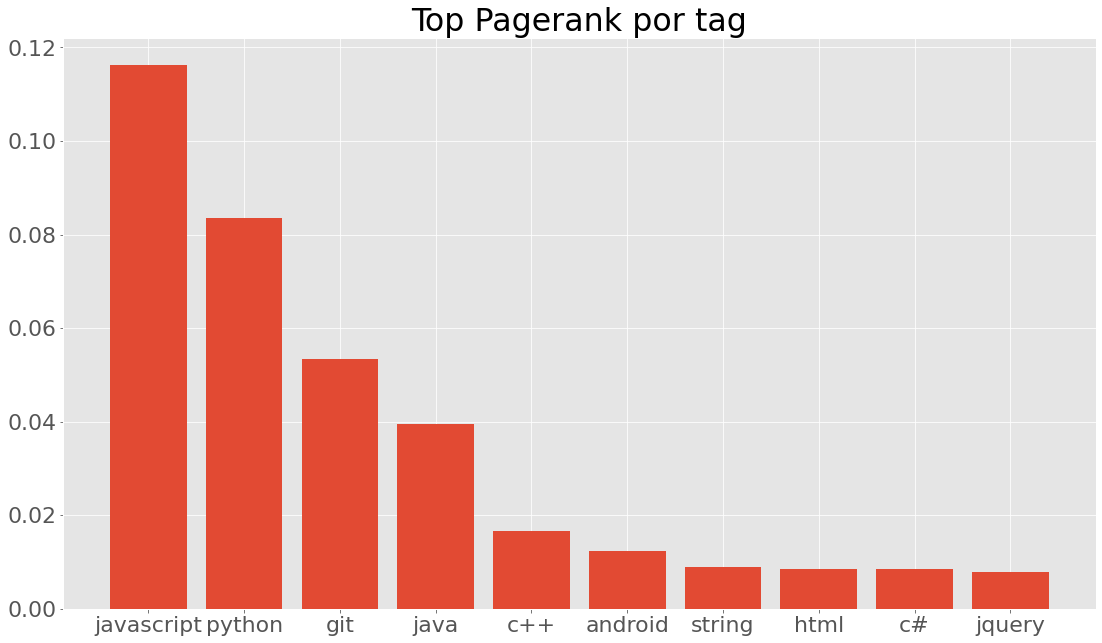

In [97]:
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.bar(x = X1["tag"], height = X1["Degree centrality"])
plt.title("Top Degree centrality por tag")
plt.show()

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.bar(x = X2["tag"], height = X2["Betweenness centrality"])
plt.title("Top Betweenness por tag")
plt.xticks(rotation=90)
plt.show()

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.bar(x = X3["tag"], height = X3["Pagerank"])
plt.title("Top Pagerank por tag")
plt.show()

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.bar(x = X4["tag"], height = X4["Closeness centrality"])
plt.title("Top Closeness centrality por tag")
plt.show()

In [98]:
nx.is_connected(G)

True